## Саргас Кирилл Игоревич, 3ИСИП-122, Распознавание жанра музыки

# Введение
Актуальность темы исследования обусловлена быстрым развитием цифровых технологий и возрастающим объемом музыкального контента, доступного в онлайн-пространстве. Автоматическое распознавание музыкальных жанров становится важным инструментом для упрощения организации, поиска и анализа данных. Это находит применение как в индустрии развлечений, так и в научных исследованиях, связанных с анализом звука и музыки.



Предметная область проекта — обработка и классификация аудиоданных с использованием методов глубокого обучения. Основная задача — построение модели, способной с высокой точностью классифицировать музыкальные треки на основе их жанров, что требует применения спектральных характеристик звукового сигнала и их обработки с помощью современных алгоритмов машинного обучения.

# Практическая реализация

Используемый датасет:
Для выполнения задачи был выбран открытый датасет [GTZAN Music Genre Dataset (genres_original)](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data), который содержит музыкальные треки 10 различных жанров. Данные включают 100 аудиофайлов для каждого жанра, что предоставляет возможность сбалансированного обучения модели. Каждый трек длительностью 30 секунд представлен в формате .wav.

In [56]:
import os # Работа с файловой системой
import librosa #для загрузки аудиофайлов и извлечения мелспектрограмм 
import tensorflow as tf # Основной фреймворк для создания и обучения нейронных сетей
import numpy as np # Для выполнения операций над массивами данных, таких как масштабирование и преобразования
from sklearn.model_selection import train_test_split # Разделение данных на обучающую и тестовую выборки
from sklearn.metrics import confusion_matrix, classification_report # Метрики для оценки качества классификации
from tensorflow.keras.utils import to_categorical #для разметки данных с помощью категориальных меток, соответствующих каждому жанру
from tensorflow.keras.callbacks import ModelCheckpoint # Для сохранения модели на этапе с наилучшими метриками
from tensorflow.image import resize # Изменение размера мелспектрограмм
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout # Слои для построения сверточной нейронной сети
from tensorflow.keras.optimizers import Adam #Оптимизатор Adam для эффективного обучения нейросетей
import seaborn as sns #для визуализации матрицы ошибок
import matplotlib.pyplot as plt #Построение графиков (например, обучения и тестирования модели)
from IPython.display import Audio #Воспроизведение аудио в Jupyter Notebook

# Предварительная обработка данных
Используется библиотека **Librosa** для загрузки аудиофайлов и извлечения **мелспектрограмм**

---

**Мелспектрограмма** - это визуальное представление звукового сигнала, которое показывает, как энергия или
мощность сигнала распределяется по различным частотам с течением времени, но с изюминкой: шкала
частот преобразуется в соответствии с тем, как люди воспринимают звук.

* **Ось X (горизонтальная)**: Время.

* **Ось Y (вертикальная)**: частота, масштабируемая в соответствии со слухом человека (шкала Mel).

* **Цвет/интенсивность**: Отображает силу или амплитуду сигнала в каждый момент времени и на каждой частоте

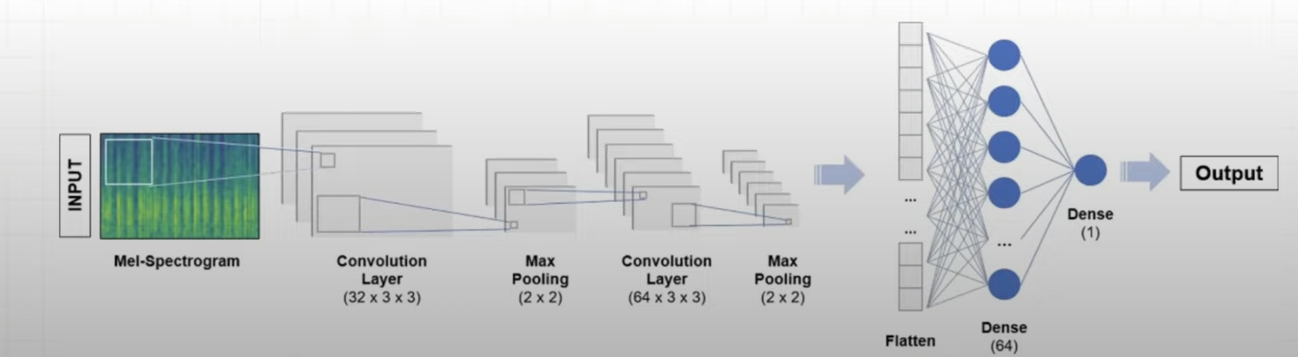

* Создадим функцию для создания мелспектрограммы всего аудио

In [2]:
#Создание мелспектрограммы аудио полностью
# sr - sample rate / частота дискретизации 
def plot_melspectrogram(y,sr):
    # вычисление спектрограммы
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    # перевод в децебелы (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Визуализация мелспектрограммы
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("melspectrogram")
    plt.tight_layout()
    plt.show()

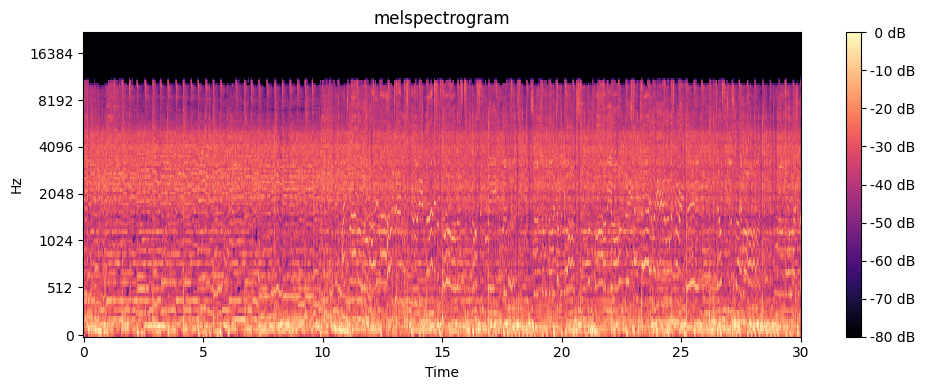

In [3]:
file_name = "./metal.00000.wav"
y,sr = librosa.load(file_name,sr=44100)
plot_melspectrogram(y,sr)

In [ ]:
Audio(data=y,rate=sr)

* Спектрограммы разрезаются на **чанки** для повышения объема данных и учета временных изменений сигнала. Это необходимо для увеличения обучающей выборки и обеспечения модели достаточным количеством данных.

In [5]:
def plot_melspectrogram_chunks(y,sr):
    # определение длительности каждого чанка и оверлапа (наложения)
    chunk_duration = 4
    overlap_duration = 2
    # перевод длительности в семплы
    chunk_samples = chunk_duration*sr
    overlap_samples = overlap_duration*sr
    #вычисление количества чанков
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    #Итерация над каждым чанком
    for i in range(num_chunks):
        #вычисление начального и конечного индексы чанка
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Извлечение звука чанка
        chunk = y[start:end]
        #мелспектрограмма
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Визуализация спектрограммы
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("melspectrogram")
        plt.tight_layout()
        plt.show()

(128, 345)


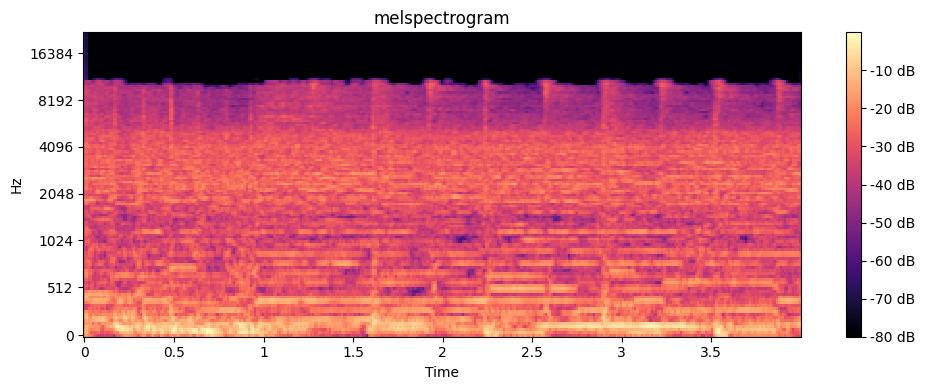

(128, 345)


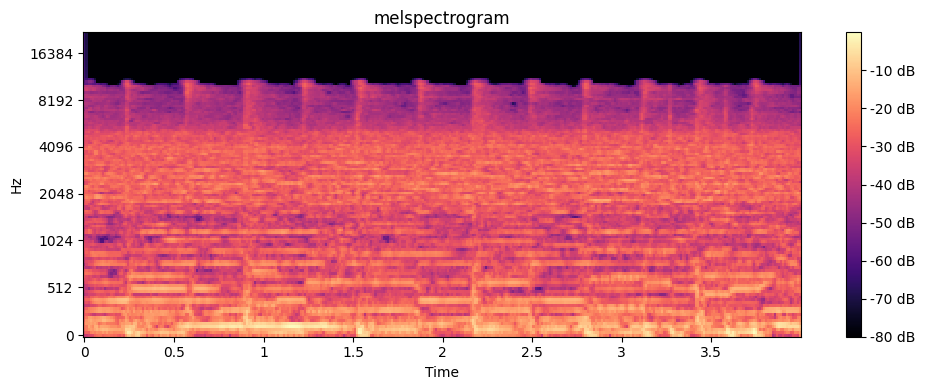

(128, 345)


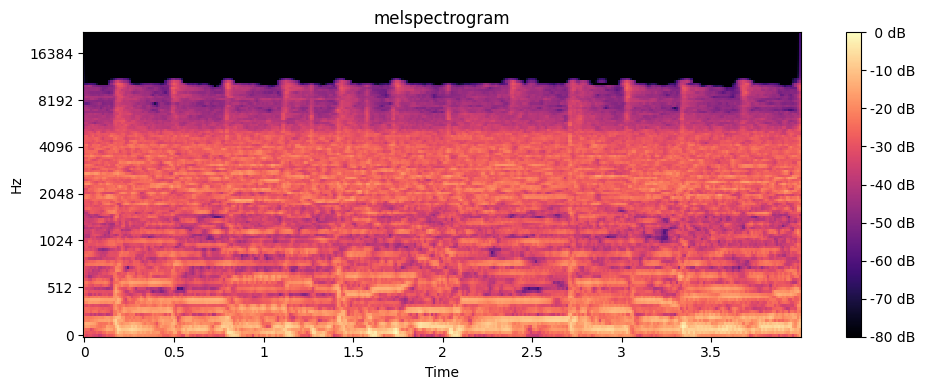

(128, 345)


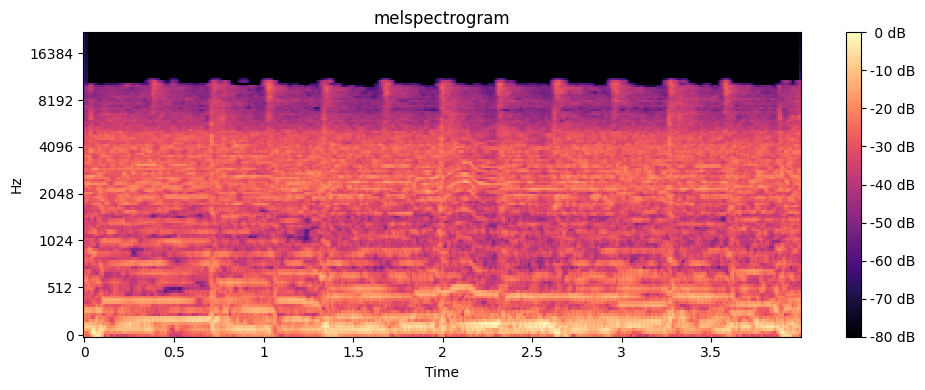

(128, 345)


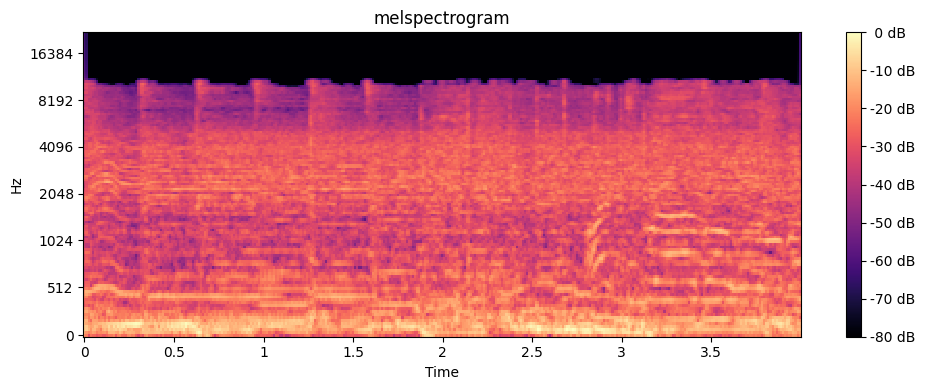

(128, 345)


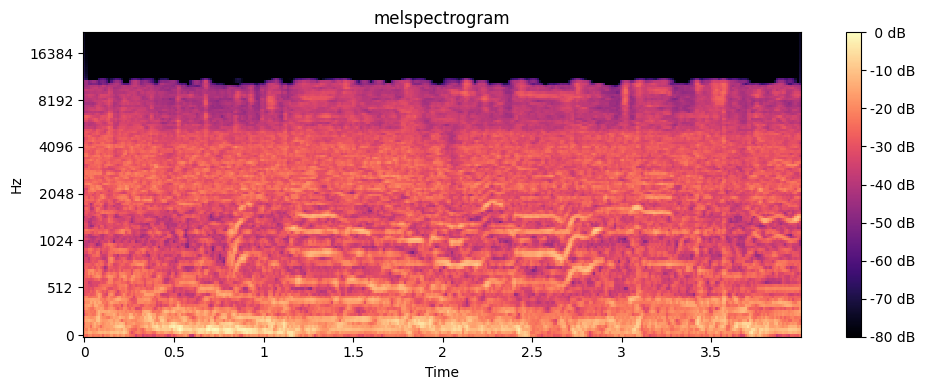

(128, 345)


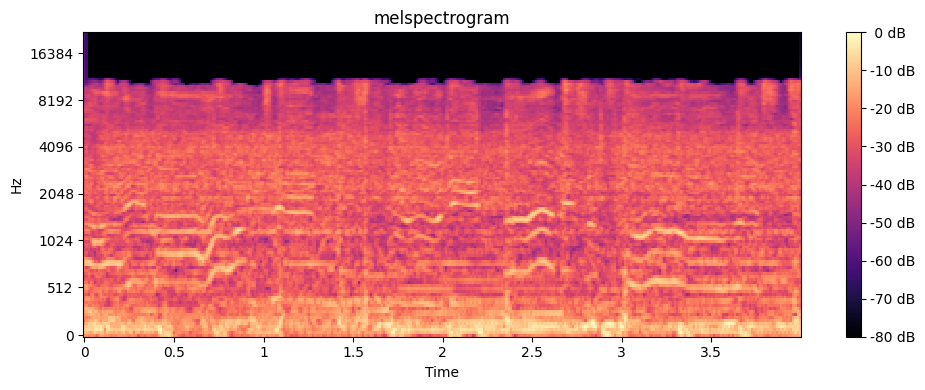

(128, 345)


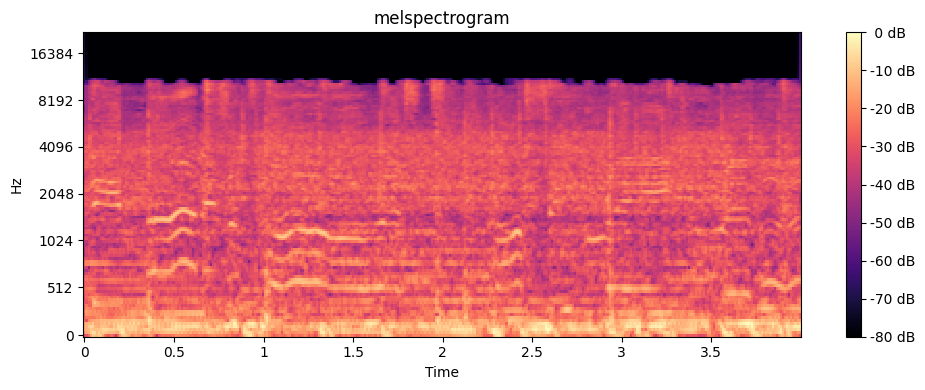

(128, 345)


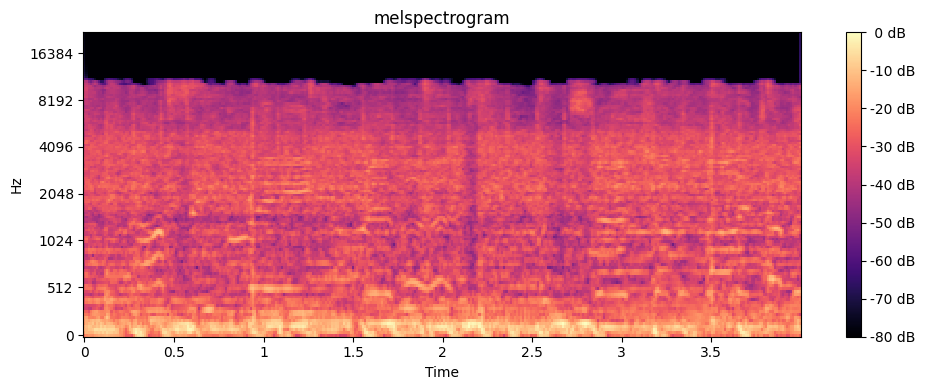

(128, 345)


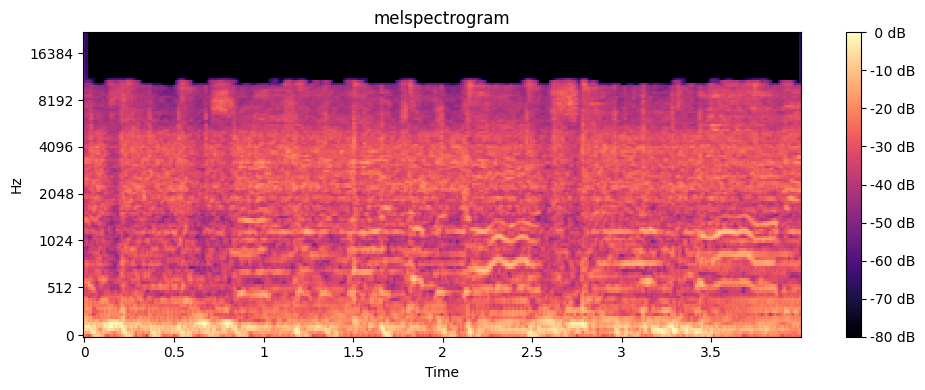

(128, 345)


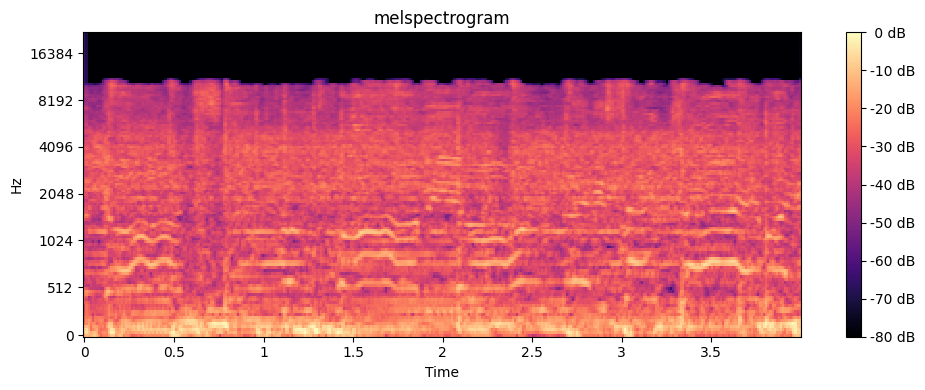

(128, 345)


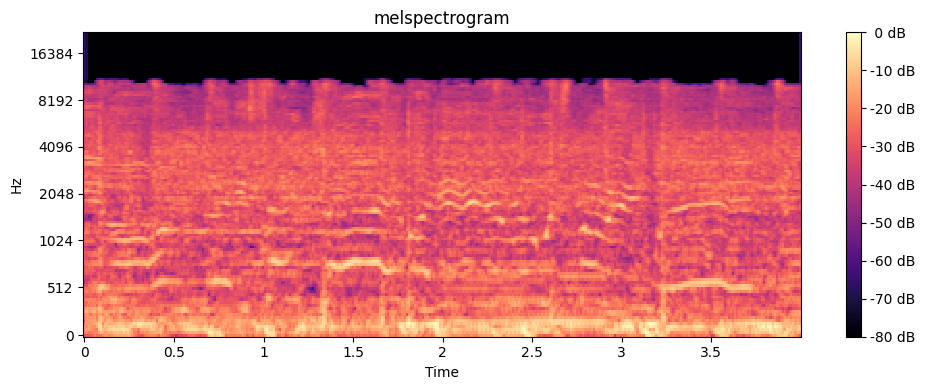

(128, 345)


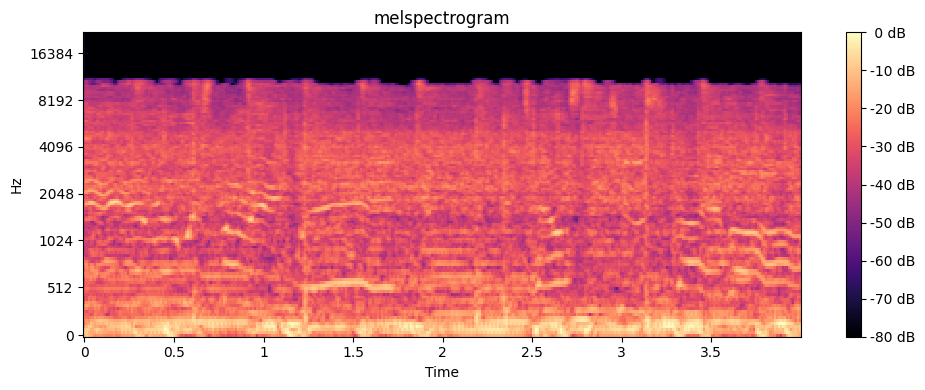

(128, 345)


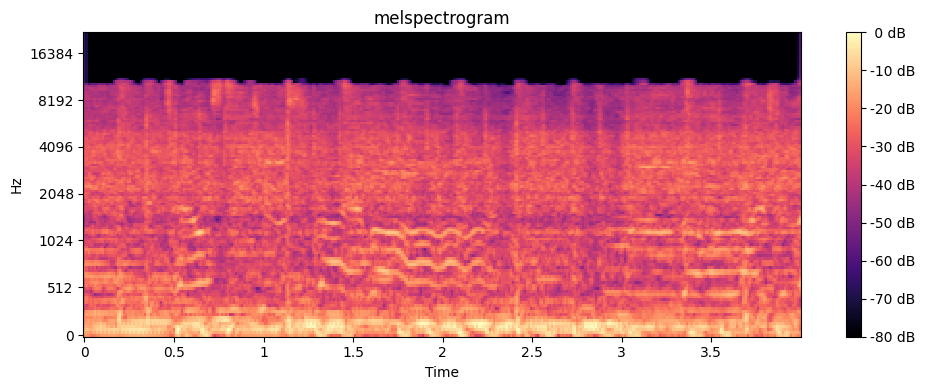

(128, 173)


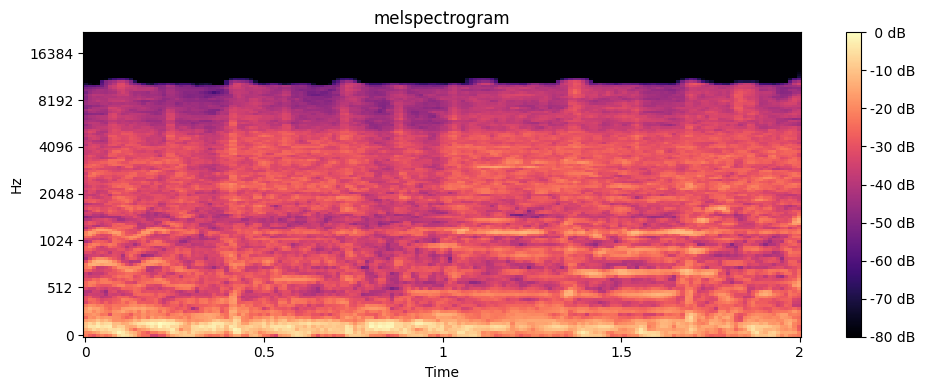

In [6]:
file_name = "./metal.00000.wav"
y,sr = librosa.load(file_name,sr=44100)
plot_melspectrogram_chunks(y,sr)

In [7]:
#структура папки, вычисление классов
data_dir = "./genres_original"
classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

# Подготовка данных:
Чанки мелспектрограмм масштабируются до заданного размера 210x210 пикселей (исходя из размера спектрограммы), что стандартизирует входные данные для свёрточной нейронной сети.

In [8]:
128*345, 210*210

(44160, 44100)

In [9]:
def load_and_preprocess_data(data_dir, classes,target_shape=(210,210)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Обработка --",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Предобработка
                #определение длительности каждого чанка и оверлапа (наложения)
                chunk_duration = 4
                overlap_duration = 2
                
                #перевод длительности в семплы
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #вычисление количества чанков
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #Итерация над каждым чанком
                for i in range(num_chunks):
                    #вычисление начального и конечного индексы чанка
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Извлечение звука чанка
                    chunk = audio_data[start:end]
                    #мелспектрограмма
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #масштабирование матрицы до заданного размера
                    #mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    mel_spectrogram = np.expand_dims(mel_spectrogram, axis=-1)
                    mel_spectrogram = resize(mel_spectrogram, target_shape).numpy()
                    #Добавление данных в массив
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    
    return np.array(data),np.array(labels)

In [10]:
data, labels = load_and_preprocess_data(data_dir,classes)

Обработка -- blues
Обработка -- classical
Обработка -- country
Обработка -- disco
Обработка -- hiphop
Обработка -- jazz
Обработка -- metal
Обработка -- pop
Обработка -- reggae
Обработка -- rock


In [11]:
data.shape, labels.shape

((14981, 210, 210, 1), (14981,))

* Также осуществляется разметка данных с помощью категориальных меток, соответствующих каждому жанру.

In [12]:
labels = to_categorical(labels,num_classes=len(classes))
labels, labels.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (14981, 10))

# Обучение модели:
Архитектура модели включает несколько свёрточных и полносвязных слоёв. Используется функция активации ReLU для нелинейности и Softmax для мультиклассовой классификации. Модель обучается на тренировочной выборке с использованием оптимизатора Adam, что обеспечивает стабильность обучения.

In [13]:
#test_size=0.2 == 80% на тренировку и 20% на тест
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X_train[0].shape

((11984, 210, 210, 1),
 (2997, 210, 210, 1),
 (11984, 10),
 (2997, 10),
 (210, 210, 1))

# Архитектура модели

Нейросеть построена на основе архитектуры **сверточной нейронной сети (CNN)**. Она предназначена для классификации аудиофайлов по музыкальным жанрам. Основное внимание уделяется извлечению особенностей мелспектрограмм, представленных в виде двумерных изображений.

---

### Входные данные
- Размер входного тензора соответствует размеру данных обучающего набора (например, размер мелспектрограммы).
- Входной слой принимает тензор с формой `(высота, ширина, каналы)`.

### Сверточные блоки
1. **Блок 1:**
   - 2 сверточных слоя с 32 фильтрами размером ядра 3x3.
   - Функция активации: `ReLU`.
   - Пулинг: MaxPooling с размером окна 2x2 и шагом 2.

2. **Блок 2:**
   - 2 сверточных слоя с 64 фильтрами размером ядра 3x3.
   - Функция активации: `ReLU`.
   - Пулинг: MaxPooling с размером окна 2x2 и шагом 2.

3. **Блок 3:**
   - 2 сверточных слоя с 128 фильтрами размером ядра 3x3.
   - Функция активации: `ReLU`.
   - Пулинг: MaxPooling с размером окна 2x2 и шагом 2.
   - Dropout с вероятностью 45% для регуляризации.

4. **Блок 4:**
   - 2 сверточных слоя с 256 фильтрами размером ядра 3x3.
   - Функция активации: `ReLU`.
   - Пулинг: MaxPooling с размером окна 2x2 и шагом 2.

5. **Блок 5:**
   - 2 сверточных слоя с 512 фильтрами размером ядра 3x3.
   - Функция активации: `ReLU`.
   - Пулинг: MaxPooling с размером окна 2x2 и шагом 2.
   - Dropout с вероятностью 45% для предотвращения переобучения.

### Плоский слой
- Преобразование данных из многомерного тензора в одномерный массив с использованием слоя `Flatten`.

### Полносвязные слои
1. Полносвязный слой с 1200 нейронами.
   - Функция активации: `ReLU`.
   - Dropout с вероятностью 50% для регуляризации.
2. Выходной слой:
   - Количество нейронов соответствует числу классов.
   - Функция активации: `Softmax` (для многоклассовой классификации).

### Оптимизация и метрики
- **Оптимизатор:** `Adam` (с learning_rate=0.0001) для стабильного обучения.
- **Функция потерь:** `categorical_crossentropy` (из-за многоклассовой природы задачи).
- **Метрика оценки:** `accuracy`.

---

## Преимущества архитектуры
- Использование **сверточных слоев** позволяет извлекать пространственные признаки мелспектрограмм.
- **MaxPooling** уменьшает размерность, сохраняя важные особенности.
- **Dropout** слои предотвращают переобучение, повышая обобщающую способность.
- **Softmax** выходной слой гарантирует корректные вероятностные распределения по классам.

Эта архитектура идеально подходит для работы с мелспектрограммами благодаря способности CNN эффективно обрабатывать изображения.


In [14]:
def create_genre_classification_model(input_shape, num_classes):
    # Создаем последовательную модель с использованием Keras Sequential API
    model = tf.keras.models.Sequential()
    
    # Первый сверточный блок с двумя слоями Conv2D и слоем MaxPool2D
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=X_train[0].shape)) # Первый сверточный слой с 32 фильтрами
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu')) # Второй сверточный слой для уточнения признаков
    model.add(MaxPool2D(pool_size=2, strides=2)) # Слой подвыборки для уменьшения размерности данных

    # Второй сверточный блок
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) # Первый слой блока с 64 фильтрами
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu')) # Второй слой для извлечения более сложных признаков
    model.add(MaxPool2D(pool_size=2, strides=2)) # Подвыборка для сокращения размерности

    # Третий сверточный блок
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=3, activation='relu')) 
    model.add(MaxPool2D(pool_size=2, strides=2)) # Подвыборка

    # Dropout для регуляризации и предотвращения переобучения
    model.add(Dropout(0.45))

    # Четвертый сверточный блок
    model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=3, activation='relu')) 
    model.add(MaxPool2D(pool_size=2, strides=2)) 

    # Пятый сверточный блок
    model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    # Dropout для улучшения обобщающей способности модели
    model.add(Dropout(0.45))

    # Преобразование данных в одномерный массив перед полносвязными слоями
    model.add(Flatten())

    # Полносвязный слой для обучения признаков высокой абстракции
    model.add(Dense(units=1200, activation='relu'))

    # Dropout для финальной регуляризации
    model.add(Dropout(0.5))

    # Выходной слой с количеством нейронов, равным числу классов, и функцией активации softmax
    # Softmax используется для задачи многоклассовой классификации
    model.add(Dense(units=len(classes), activation='softmax'))

    # Компиляция модели с оптимизатором Adam, функцией потерь categorical_crossentropy
    # и метрикой accuracy для оценки точности
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [15]:
model = create_genre_classification_model(X_train, classes)
# Вывод структуры модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 210, 210, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 208, 208, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 104, 104, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 102, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 64)       0         
 2D)                                                    

* Создаем чекпоинт для сохранения лучшей модели

In [16]:
checkpoint = ModelCheckpoint(
    filepath='Trained_model.h5', 
    monitor='val_accuracy',   # Метрика для отслеживания
    save_best_only=True,      # Сохранять только лучшую модель
    mode='max',               # Ищем максимум val_accuracy
    verbose=1                 # Вывод сообщения о сохранении
)

In [17]:
with tf.device('/GPU:0'): training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 1.9394 - accuracy: 0.2865
Epoch 1: val_accuracy improved from -inf to 0.43944, saving model to Trained_model.h5
375/375 [==============================] - 57s 136ms/step - loss: 1.9394 - accuracy: 0.2865 - val_loss: 1.5553 - val_accuracy: 0.4394
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 1.4225 - accuracy: 0.4937
Epoch 2: val_accuracy improved from 0.43944 to 0.54688, saving model to Trained_model.h5
375/375 [==============================] - 48s 129ms/step - loss: 1.4225 - accuracy: 0.4937 - val_loss: 1.2777 - val_accuracy: 0.5469
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 1.1600 - accuracy: 0.6010
Epoch 3: val_accuracy improved from 0.54688 to 0.64531, saving model to Trained_model.h5
375/375 [==============================] - 48s 128ms/step - loss: 1.1600 - accuracy: 0.6010 - val_loss: 1.0514 - val_accuracy: 0.6453
Epoch 4/30
375/375 [==========================

In [19]:
training_history.history

{'loss': [1.9394052028656006,
  1.422484040260315,
  1.1599972248077393,
  1.0100024938583374,
  0.8429332375526428,
  0.7089900970458984,
  0.6050158143043518,
  0.5151187777519226,
  0.4313216507434845,
  0.3793151080608368,
  0.32552093267440796,
  0.28078004717826843,
  0.24519629776477814,
  0.20363107323646545,
  0.18981529772281647,
  0.15184468030929565,
  0.1520843505859375,
  0.13250795006752014,
  0.1254521906375885,
  0.10484069585800171,
  0.10850267857313156,
  0.09159041196107864,
  0.07498940825462341,
  0.08225861191749573,
  0.07818657159805298,
  0.06501738727092743,
  0.07121151685714722,
  0.06031918153166771,
  0.06679901480674744,
  0.04441075026988983],
 'accuracy': [0.28646528720855713,
  0.4936582148075104,
  0.6009679436683655,
  0.6507009267807007,
  0.7116155028343201,
  0.7590954899787903,
  0.7982309460639954,
  0.8232643604278564,
  0.8523865342140198,
  0.8726635575294495,
  0.8840954899787903,
  0.9042056202888489,
  0.9132176041603088,
  0.92940586805

In [20]:
#запись истории в json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [21]:
#перезрагрузка модели в переменную
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 210, 210, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 208, 208, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 104, 104, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 102, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 64)       0         
 2D)                                                    

In [22]:
#перезагрузка истории обучения
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

# Оценка производительности:
После обучения модель тестируется на ранее невидимых данных. Основные метрики, такие как точность, потери и матрица ошибок, анализируются для оценки качества классификации.

### Основные метрики для оценки производительности

 1. Точность (Accuracy)
Точность измеряет долю правильно классифицированных объектов от общего числа тестовых данных.

 2. Потери (Loss)
Потери измеряют расхождение между предсказаниями модели и истинными значениями.  
Для классификации используется **категориальная кроссэнтропия**:

3. Матрица ошибок (Confusion Matrix)
Матрица ошибок показывает, сколько раз модель правильно или ошибочно классифицировала данные для каждого класса.  

- **Строки** — истинные классы  
- **Столбцы** — предсказанные классы  

    Матрица ошибок предоставляет детальную информацию о качестве классификации.

4. Классификационный отчет (Classification Report)
Классификационный отчет включает следующие метрики:

- **Точность (Precision)** — доля корректных положительных предсказаний

- **Полнота (Recall)** — доля правильно найденных положительных примеров

- **F1-мера** — гармоническое среднее точности и полноты

In [23]:
training_history_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

* оценка модели на тренировочном сете

In [25]:
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 [==============================] - 12s 31ms/step - loss: 0.0067 - accuracy: 0.9980


* оценка модели на тестовом сете

In [27]:
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 [==============================] - 3s 32ms/step - loss: 0.2195 - accuracy: 0.9406


In [29]:
training_history_data['val_accuracy']

[0.43943944573402405,
 0.5468801856040955,
 0.6453119516372681,
 0.7150483727455139,
 0.6629963517189026,
 0.8008008003234863,
 0.8211544752120972,
 0.8184851408004761,
 0.8538538813591003,
 0.8661995530128479,
 0.8478478193283081,
 0.8822155594825745,
 0.883550226688385,
 0.8915582299232483,
 0.8955622315406799,
 0.9035702347755432,
 0.9089089035987854,
 0.9119119048118591,
 0.8988988995552063,
 0.9152485728263855,
 0.8938938975334167,
 0.9215882420539856,
 0.9162495732307434,
 0.9305972456932068,
 0.9132465720176697,
 0.9235902428627014,
 0.916583240032196,
 0.916583240032196,
 0.9299299120903015,
 0.9406072497367859]

<function matplotlib.pyplot.show(close=None, block=None)>

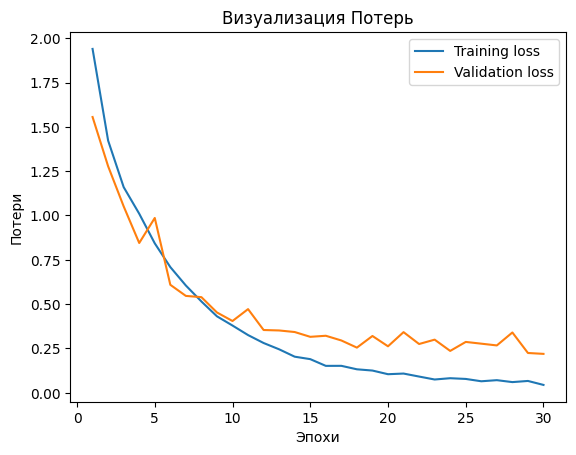

In [30]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training loss")
plt.plot(epochs,training_history_data['val_loss'],label="Validation loss")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.title("Визуализация Потерь")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

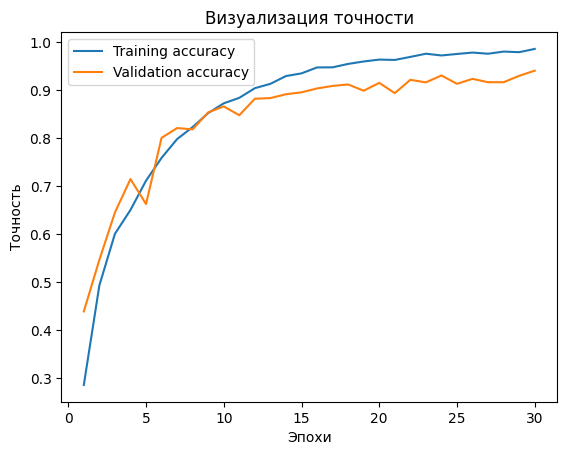

In [31]:
plt.plot(epochs,training_history_data['accuracy'],label="Training accuracy")
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation accuracy")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.title("Визуализация точности")
plt.legend()
plt.show

In [32]:
y_pred = model.predict(X_test)
y_pred,y_pred.shape

94/94 [==============================] - 3s 30ms/step


(array([[7.9804705e-09, 3.8016201e-10, 1.2343674e-05, ..., 6.0093470e-08,
         2.0627809e-05, 1.3399087e-03],
        [6.9791043e-15, 1.5796658e-17, 1.0659808e-13, ..., 1.1742401e-16,
         1.2519632e-14, 5.9793863e-09],
        [1.1597781e-14, 8.9049861e-12, 6.5211212e-15, ..., 3.0592997e-14,
         7.4707650e-13, 3.3564804e-06],
        ...,
        [3.9414325e-04, 9.5446700e-01, 6.2576728e-03, ..., 1.0249139e-02,
         4.7414838e-03, 1.0692582e-02],
        [1.1658853e-11, 2.9618722e-18, 1.2426510e-15, ..., 7.5762597e-17,
         1.7403580e-18, 4.1794962e-08],
        [0.0000000e+00, 0.0000000e+00, 2.1668494e-36, ..., 1.0000000e+00,
         1.0342144e-22, 1.3557076e-33]], dtype=float32),
 (2997, 10))

* Предсказываем категории

In [33]:
#Предсказание
predicted_categories = np.argmax(y_pred,axis=1)#axis=1 == итерация по столбцам
predicted_categories

array([3, 6, 6, ..., 1, 6, 7], dtype=int64)

In [34]:
#Действительные категории
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([3, 6, 6, ..., 1, 6, 7], dtype=int64)

In [35]:
cm = confusion_matrix(true_categories,predicted_categories)
# Precision, Recall, F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.94      0.92      0.93       302
   classical       0.95      0.99      0.97       298
     country       0.87      0.92      0.89       321
       disco       0.96      0.94      0.95       301
      hiphop       0.99      0.94      0.96       281
        jazz       0.97      0.96      0.97       332
       metal       0.96      0.97      0.97       315
         pop       0.95      0.94      0.95       303
      reggae       0.96      0.92      0.94       259
        rock       0.88      0.90      0.89       285

    accuracy                           0.94      2997
   macro avg       0.94      0.94      0.94      2997
weighted avg       0.94      0.94      0.94      2997



In [36]:
#Матрица ошибок
cm

array([[279,   0,  15,   0,   0,   3,   0,   1,   2,   2],
       [  0, 294,   0,   0,   0,   1,   0,   1,   0,   2],
       [  7,   2, 294,   2,   0,   3,   1,   1,   0,  11],
       [  2,   1,   5, 283,   1,   0,   1,   1,   2,   5],
       [  0,   0,   0,   4, 264,   0,   2,   2,   6,   3],
       [  0,   7,   3,   0,   0, 320,   0,   0,   0,   2],
       [  2,   0,   2,   0,   0,   0, 306,   0,   0,   5],
       [  0,   1,   5,   6,   0,   1,   0, 286,   0,   4],
       [  4,   1,   4,   1,   2,   2,   1,   6, 237,   1],
       [  4,   4,  10,   0,   0,   0,   8,   3,   0, 256]], dtype=int64)

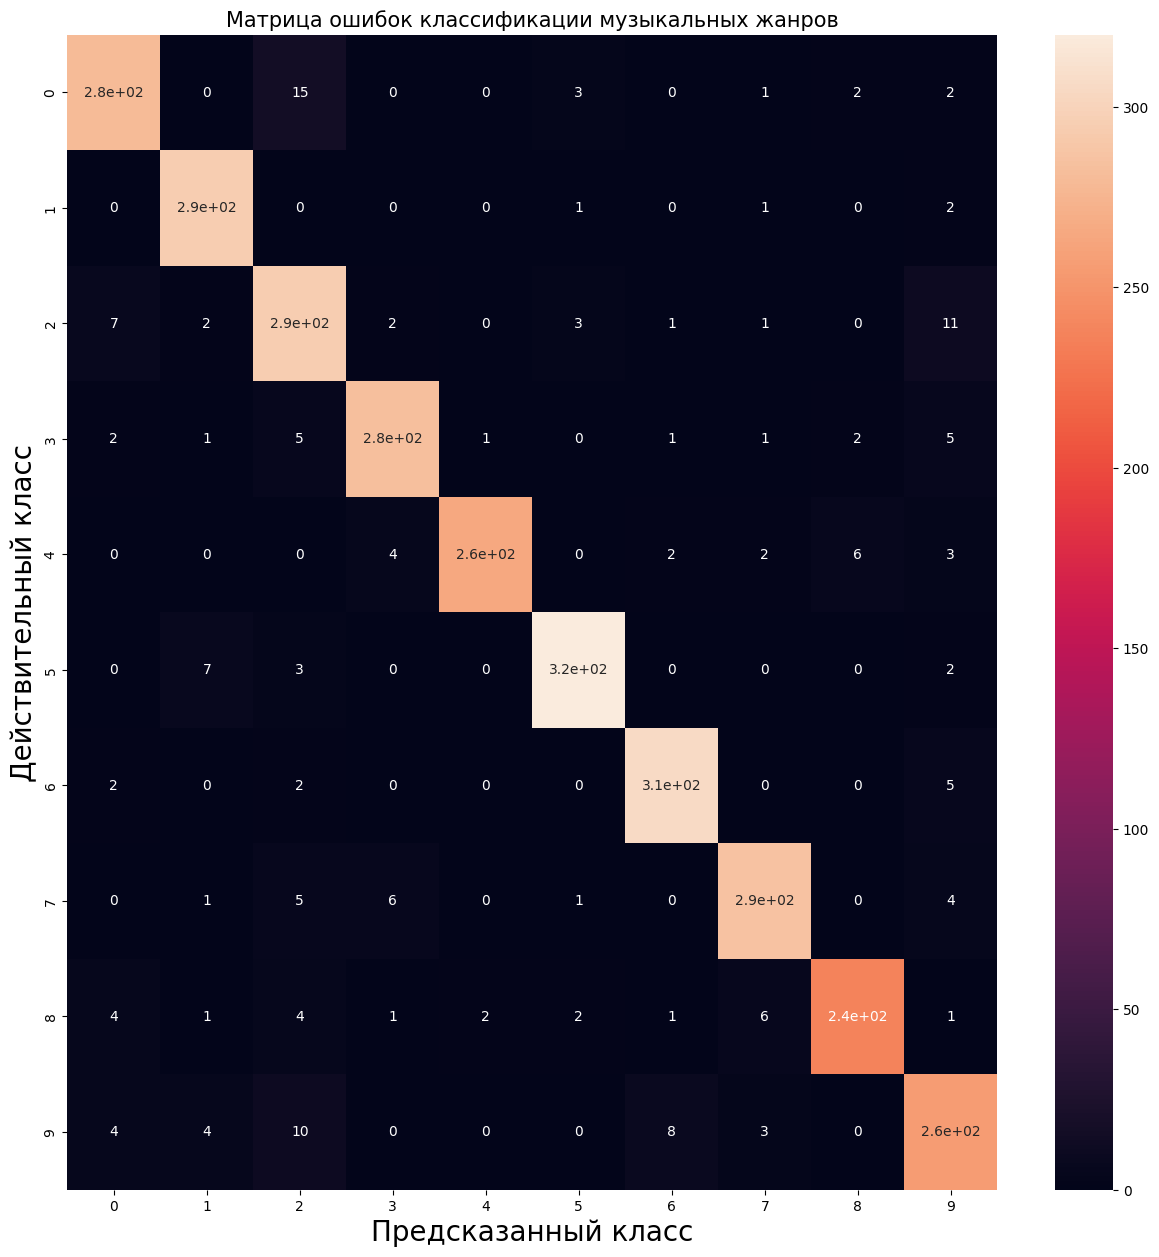

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Предсказанный класс",fontsize=20)
plt.ylabel("Действительный класс",fontsize=20)
plt.title("Матрица ошибок классификации музыкальных жанров",fontsize=15)
plt.show()

# Прогнозирование на новых данных:
Реализована функция для предсказания жанра трека вне датасета

In [38]:
model = tf.keras.models.load_model("Trained_model.h5")

* Преобразуем входной сигнал в мелспектрограмму и обрабатываем её

In [39]:
def load_and_preprocess_file(file_path, target_shape=(210, 210)):
    data = []
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    # Обработка (перевод в мелспектрограмму, масштабирование)
    # определение длительности каждого чанка и оверлапа
    chunk_duration = 4  # секунд
    overlap_duration = 2
                
    # перевод длительности в семплы
    chunk_samples = chunk_duration * sample_rate
    overlap_samples = overlap_duration * sample_rate
                
    # вычисление количества чанков
    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
    # Итерация над каждым чанком
    for i in range(num_chunks):
                    # вычисление начального и конечного индексы чанка
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
                    
                    # #Извлечение звука чанка
        chunk = audio_data[start:end]
                    
                    # вычисление Мел спектрограммы для чанка
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    
                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
        data.append(mel_spectrogram)
    
    return np.array(data)

* Возвращаем наиболее вероятный жанр

In [40]:
def model_prediction(X_test):
    y_pred = model.predict(X_test) # Получение предсказаний модели для тестового набора данных
    predicted_categories = np.argmax(y_pred, axis=1) # Преобразование вероятностей в категории путем выбора индекса с максимальным значением
    unique_elements,counts = np.unique(predicted_categories,return_counts=True) # Получение уникальных категорий и подсчет их количества в предсказаниях
    max_count = np.max(counts) # Поиск максимального количества предсказаний для одной категории
    max_elements = unique_elements[counts==max_count] # Выбор категории, которая имеет максимальное количество предсказаний
    return max_elements[0] # Возвращение категории с наибольшим числом предсказаний

Протестируем модель на треках:

- Candlemass - Black_Stone_Wielder (Метал)
- Моцарт - Piano Sonata No.11 Rondo Alla Turca (Классика)
- Eminem - Rap God (Хип-Хоп)

In [ ]:
file_path = "Candlemass_-_Black_Stone_Wielder.mp3" #Метал
y, sr = librosa.load(file_path, sr=None)
X_test = load_and_preprocess_file(file_path)
Audio(data=y, rate=sr)

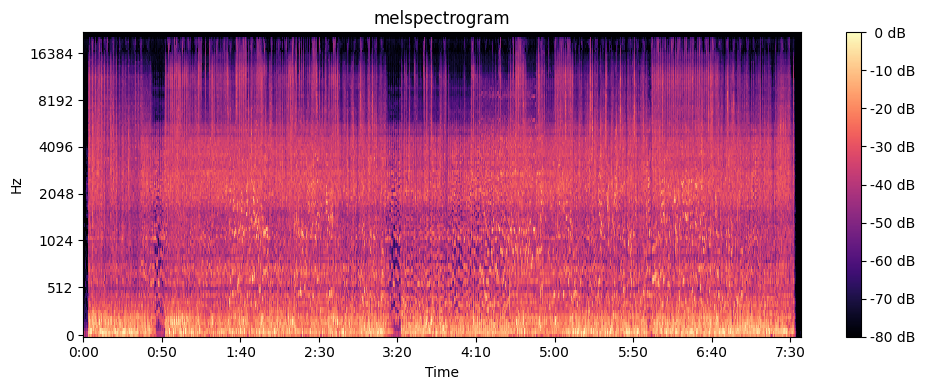

In [42]:
plot_melspectrogram(y,sr)

In [43]:
X_test.shape

(228, 210, 210, 1)

In [44]:
c_index = model_prediction(X_test)
classes[c_index]

8/8 [==============================] - 1s 103ms/step


'metal'

In [ ]:
file_path = "Wolfgang Amadeus Mozart - Piano Sonata No.11 Rondo Alla Turca.mp3" #Классика
y, sr = librosa.load(file_path, sr=None)
X_test = load_and_preprocess_file(file_path)
Audio(data=y, rate=sr)

In [53]:
X_test.shape

(112, 210, 210, 1)

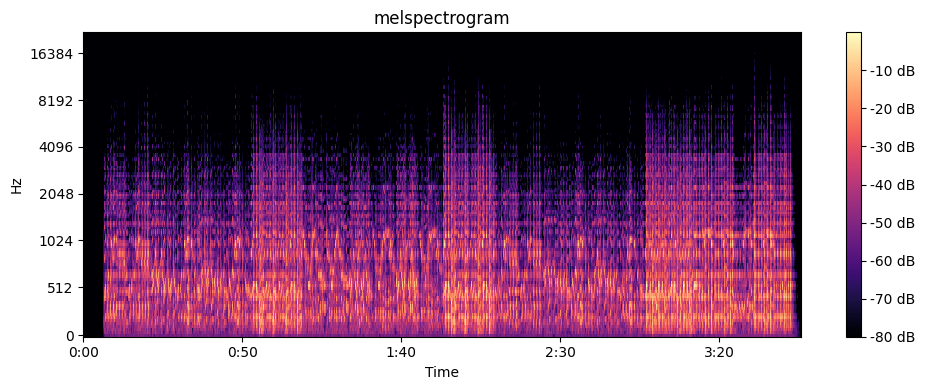

In [54]:
plot_melspectrogram(y,sr)

In [55]:
c_index = model_prediction(X_test)
classes[c_index]

4/4 [==============================] - 0s 104ms/step


'classical'

In [ ]:
file_path = "Eminem - Rap God.mp3" # Хип-хоп / Рэп
y, sr = librosa.load(file_path, sr=None)
X_test = load_and_preprocess_file(file_path)
Audio(data=y, rate=sr)

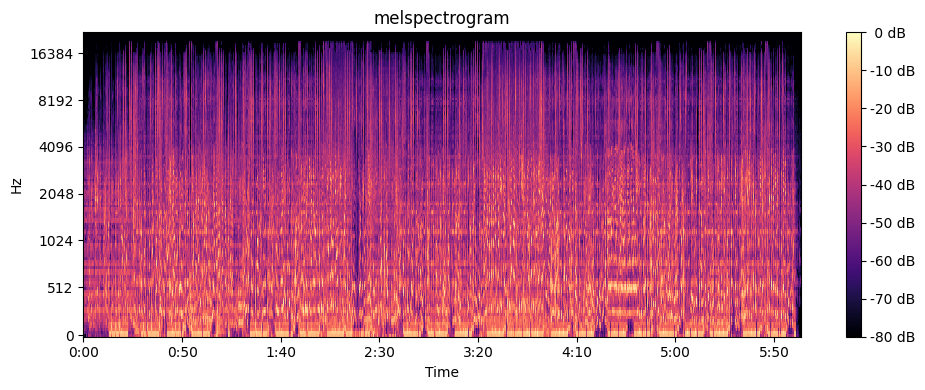

In [50]:
plot_melspectrogram(y,sr)

In [51]:
c_index = model_prediction(X_test)
classes[c_index]

6/6 [==============================] - 0s 75ms/step


'hiphop'

# Заключение
В результате проведённого эксперимента была обучена модель глубокого обучения для классификации музыкальных жанров с использованием спектрограмм аудиотреков. Обучение модели проходило на сбалансированном наборе данных, содержащем 10 жанров: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock. Архитектура модели состояла из нескольких сверточных слоев, чередующихся с пуллингами, и завершалась плотными слоями. Итоговое количество параметров модели составило около 14,5 миллионов.

Во время обучения модель достигла высокой точности. На тестовой выборке модель продемонстрировала точность 94%, при этом наиболее точно классифицировались такие жанры, как hip-hop (99%) и jazz (97%). Средний показатель F1-метрики также составил 94%, что подтверждает баланс между точностью и полнотой модели. Это свидетельствует о высоком уровне обобщающей способности модели для решения задачи классификации музыкальных жанров.

# Список источников

1.   [Kaggle Датасет GTZAN Dataset - Music Genre Classification (genres_original)](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data)
2.   [Music Genre Classifier using Machine Learning](https://www.geeksforgeeks.org/music-genre-classifier-using-machine-learning/)
3.   [(YouTube) Music Genre Classification System | Building Audio Classification System using Python | Machine Learning Project](https://www.youtube.com/playlist?list=PLvz5lCwTgdXCd200WNDupTMo15DP9iryv)
4.   [Stanford Convolutional Neural Networks Cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)
5.   [Librosa для анализа музыки](https://librosa.org/doc/latest/index.html)
6.   [Tensorflow](https://www.tensorflow.org/install/pip#windows-native)